<div class='heading'>
    <div style='float:left;'><h1>CPSC 4300/6300: Applied Data Science</h1></div>
    <img style="float: right; padding-right: 10px; width: 65px" src="https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/images/clemson_paw.png"> </div>


## Homework 2: k-NN Regression

**Clemson University**<br>
**Fall 2021**<br>
**Instructor(s):** Nina Hubig <br>


---



In [60]:
""" RUN THIS CELL TO GET THE RIGHT FORMATTING """
import requests
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/css/cpsc6300.css'
styles = requests.get(css_file).text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed or otherwise limited. 

---

In this homework, we will explore regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York City at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `nyc_taxi.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

In [61]:
import numpy as np
import pandas as pd

from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

<div class="theme"> Question 1 </div>

We next consider simple linear regression, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

<div class="exercise"> <b> Question 1.1 </b> Use pandas to load the dataset from the csv file `nyc_taxi.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set data frame as `train_data` and your test set data frame as `test_data`.</div>

In [62]:
# Your code here
df = pd.read_csv('nyc_taxi.csv')
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
test_data.head()


,TimeMin,PickupCount
680,436.0,24.0
1102,408.0,9.0
394,1189.0,51.0
930,139.0,66.0
497,756.0,15.0


<div class="exercise"> <b> Question 1.2 </b> </div>

Again choose `TimeMin` as your predictor and `PickupCount` as your response variable.  Create an `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

In [63]:
x_train = train_data['TimeMin']
y_train = train_data['PickupCount']
M = sm.add_constant(x_train)
x_test = test_data['TimeMin']
y_test = test_data['PickupCount']
K = sm.add_constant(x_test)
OLSModel = sm.OLS(y_train,M)
OLSModel = OLSModel.fit()
OLSModel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PickupCount   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     320.4
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           2.34e-62
Time:                        23:37:41   Log-Likelihood:                -4232.9
No. Observations:                1000   AIC:                             8470.
Df Residuals:                     998   BIC:                             8480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7506      1.058     15.838      0.000      14.675      18.826
TimeMin        0.0233      0.001     17.900      0.000       0.021       0.026
==============================================================================
Omnibus:                      203.688   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              462.910
Skew:                           1.111   Prob(JB):                    3.02e-101
Kurtosis:                       5.485   Cond. No.                     1.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="exercise"> <b> Question 1.3 </b> </div>

Create a plot just like you did in question 2.2 from Homework 2 (but with fewer subplots): plot both the observed values and the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  

In [64]:
# Your code here
import numpy as np
import pandas as pd

from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

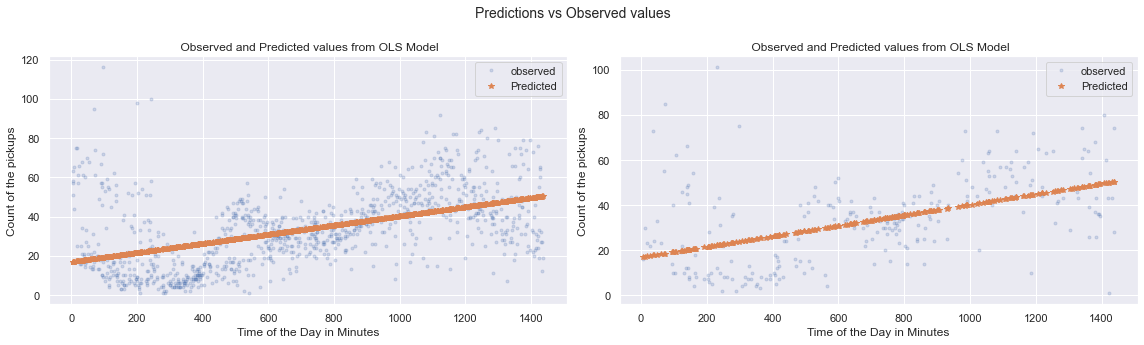

In [65]:
olsmodel_train=OLSModel.predict(M)
olsmodel_test=OLSModel.predict(K)
def plot_olsmodel_prediction(ax, dataset, predictions, k, dataset_name= "Training"):
    
    # scatter plot actual
    ax.plot(dataset['TimeMin'], dataset['PickupCount'], '.', alpha=0.2, label='observed')
    
    # scatter plot predictions
    ax.plot(dataset['TimeMin'], predictions, '*',  label='Predicted')
    
    # Set labels
    ax.set_title(" Observed and Predicted values from OLS Model")
    ax.set_xlabel('Time of the Day in Minutes')
    ax.set_ylabel('Count of the pickups')
    ax.legend()

    
# Notice that nrows is set to the variable size. This makes the code more readable and adaptable
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(16,5))
fig.suptitle('Predictions vs Observed values', fontsize=14)

plot_olsmodel_prediction(axes[0], train_data, olsmodel_train, "Training")
plot_olsmodel_prediction(axes[1], test_data, olsmodel_test, "Test")

fig.tight_layout(rect=[0,0.03,1,0.98])



<div class="exercise"> <b> Question 1.4 </b> </div>

Report the $R^2$ score for the fitted model on both the training and test sets.

In [66]:
# Your code here
r_train = str(r2_score(y_train,olsmodel_train))
r_test = str(r2_score(y_test, olsmodel_test))
print("r-square score for the train data: " +r_train)
print("r-square score for the test data: " +r_test)

r-square score for the train data: 0.2430260353189334
r-square score for the test data: 0.240661535615741


<div class="exercise"> <b> Question 1.5 </b> </div>

Report the estimates for the slope and intercept for the fitted linear model.  

In [67]:
intercept_lm = str(OLSModel.params[0])
slope_lm = str(OLSModel.params[1])
print("Intercept of the fitted linear model is: " +intercept_lm)
print("Slope of the fitted linear model is: "+slope_lm)



Intercept of the fitted linear model is: 16.75060142744682
Slope of the fitted linear model is: 0.02333517569239734


<div class="exercise"> <b> Question 1.6 </b> </div>

Report the $95\%$ confidence intervals (CIs) for the slope and intercept.  

In [68]:
# Your code here
ci_slope = str(OLSModel.conf_int()[0][1]) + '-' + str(OLSModel.conf_int()[1][1])
ci_intercept = str(OLSModel.conf_int()[0][0]) + '-' + str(OLSModel.conf_int()[1][0])
print("confidence interval for the Slope is: " +ci_slope)
print("confidence interval for the Intercept is: " +ci_intercept)

confidence interval for the Slope is: 0.020776972818257716-0.025893378566536965
confidence interval for the Intercept is: 14.675141344657373-18.82606151023627


<div class="exercise"> <b> Question 1.7 </b> </div>

Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?  Describe why this is not surprising for these data.
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Interpret the $95\%$ confidence intervals from 3.5.  Based on these CIs is there evidence to suggest that the number of taxi pickups has a significant linear relationship with time of day?  How do you know? 
4. How would $99\%$ confidence intervals for the slope and intercept compare to the $95\%$ confidence intervals (in terms of midpoint and width)?  Briefly explain your answer.  
5. Based on the data structure, what restriction on the model would you put at the endpoints (at $x\approx0$ and $x\approx1440$)?   What does this say about the appropriateness of a linear model?

 ## Answer
*your answer here*  
1) In my opinion, the best R-square value obtained with the K-NN regression is 0.39 when K=75. For the linear model, the R-square value is 0.243, which is less than the best R-square value obtained with the K-NN. Generally, the R-squared value lies in between -1 to +1. Values close to zero indicate a weak relationship. So, the good fit happened while using K-NN. It is not surprising for these data because the pickup counts at the different times of the day were fluctuating, and by observing the R-squared value of K-NN, we can conclude that K-NN was a good fit model for the provided data.

2) The slope of the data describes a positive sign, which indicates a decent dataset having a good relationship between the Timemin data and PickupCount data.

3) The confidence intervals of intercept and slope values prove a significant linear relationship between the time of the day and the pickup counts because the values of both intercept and slopes are in positive intervals.

4) With 95% confidence interval, there is a chance of getting 5% wrong, but with 99% confidence interval, the chance of getting wrong is 1%. The 99% confidence interval is much wider than 95% confidence interval. The midpoints of slope and intercept are 0.0233 and 16.75.

5) From the data, we can observe that the X = 0 is the starting and X= 1440 is the endpoint, I would restrict the model if there is data provided after X = 1440 apply the model for the following data. We can see a curved relationship in the scatter plots for the given data, and the linear model is not appropriate.



<div class="theme"> Question 2 </div>

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.  **Note, this is an open-ended question, there is not one correct solution (or one correct definition of an outlier).**

<div class="exercise"><b> Question 2.1 </b></div>

We've provided you with two files `outliers_train.csv` and `outliers_test.csv` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?

In [69]:
# Your code here
df2_train = pd.read_csv('outliers_train.csv')
df2_test = pd.read_csv('outliers_test.csv')
df2_train.head()

,X,Y
0,-0.773019,-219.103753
1,-0.394034,-334.859357
2,0.630360,-16.232549
3,-0.350418,-179.034618
4,-1.491328,-109.710316


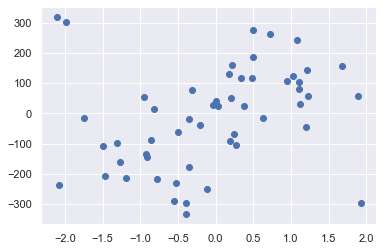

In [70]:
#plotting
plt.scatter(df2_train["X"], df2_train["Y"])

*Your answer here*
we can find few outliers when (X = 1.8, Y= -300), (X = -2.0,Y = 300), and(X = -1.8, Y = 320).

<div class="exercise"><b> Question 2.2 </b></div>

Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel` and display the model summary.

In [71]:
# Your code here

x_train = df2_train['X']
y_train = df2_train['Y']
L = sm.add_constant(x_train)
x_test = df2_test['X']
y_test = df2_test['Y']
N = sm.add_constant(x_test)
OutlierOLSModel = sm.OLS(y_train,L)
OutlierOLSModel = OutlierOLSModel.fit()
OutlierOLSModel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     4.689
Date:                Fri, 17 Sep 2021   Prob (F-statistic):             0.0351
Time:                        23:41:19   Log-Likelihood:                -343.59
No. Observations:                  53   AIC:                             691.2
Df Residuals:                      51   BIC:                             695.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.5063     22.192     -0.428      0.670     -54.059      35.046
X             47.3554     21.869      2.165      0.035       3.452      91.259
==============================================================================
Omnibus:                        2.102   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.350   Jarque-Bera (JB):                1.251
Skew:                           0.215   Prob(JB):                        0.535
Kurtosis:                       3.617   Cond. No.                         1.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="exercise"><b> Question 2.3 </b></div>

You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?

## Answer
*Your answer here.* 

By using brute force method we need to check every points in the data. there are 53 observations in the given dataset for removing the outliers we need to go through the data 3 times,firstly 53, secondly 52 and thirdly 51 times

<div class="exercise"><b> Question 2.4 </b></div>

In CPSC 4300 we're strong believers that creating heuristic models is a great way to build intuition. In that spirit, construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x` and `dataset_y`, and `num_outliers` representing your features, response variable values (make sure your response variable is stored as a numpy column vector), and the number of outliers to remove.  The return value should be a list `outlier_indices` representing the indices of the `num_outliers` outliers in the original datasets you passed in.  Run your algorithm and remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeSimpleModel` display the summary of this model.

In [ ]:
def find_outliers_simple(dataset_x, dataset_y, num_outliers):
    
    # Your code here
    
    
    
    pass

In [ ]:
# Your code here

In [58]:
# Your code here
OutlierFreeSimpleModel = sm.OLS(y_train,L)
OutlierFreeSimpleModel = OutlierFreeSimpleModel.fit()
OutlierFreeSimpleModel.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     4.689
Date:                Fri, 17 Sep 2021   Prob (F-statistic):             0.0351
Time:                        22:56:07   Log-Likelihood:                -343.59
No. Observations:                  53   AIC:                             691.2
Df Residuals:                      51   BIC:                             695.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.5063     22.192     -0.428      0.670     -54.059      35.046
X             47.3554     21.869      2.165      0.035       3.452      91.259
==============================================================================
Omnibus:                        2.102   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.350   Jarque-Bera (JB):                1.251
Skew:                           0.215   Prob(JB):                        0.535
Kurtosis:                       3.617   Cond. No.                         1.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="exercise"><b> Question 2.5 </b></div>

Create a figure with two subplots. The first is a scatterplot where the color of the points denotes the outliers from the non-outliers in the training set, and include two regression lines on this scatterplot: one fitted with the outliers included and one fitted with the outlier removed (all on the training set).  The second plot should include a scatterplot of points from the test set with the same two regression lines fitted on the training set: with and without outliers.  Visually which model fits the test set data more closely?

In [ ]:
# Your code here

olsmodel_train=OLSModel.predict(M)
olsmodel_test=OLSModel.predict(K)
def plot_olsmodel_prediction(ax, dataset, predictions, k, dataset_name= "Training"):
    
    # scatter plot actual
    ax.plot(dataset['X'], dataset['Y'], '.', alpha=0.2, label='observed')
    
    # scatter plot predictions
    ax.plot(dataset['X'], predictions, '*',  label='Y')
    
    # Set labels
    ax.set_title(" Scatter Plot")
    ax.set_xlabel(' X ')
    ax.set_ylabel(' Y ')
    ax.legend()

    
# Notice that nrows is set to the variable size. This makes the code more readable and adaptable
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(16,5))
fig.suptitle('outliers vs non-outliers', fontsize=14)

plot_olsmodel_prediction(axes[0], train_data, olsmodel_train, "Training")
plot_olsmodel_prediction(axes[1], test_data, olsmodel_test, "Test")

fig.tight_layout(rect=[0,0.03,1,0.98])




*Your answer here*

<div class="exercise"><b> Question 2.6 </b></div>

Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

In [ ]:
# Your code here
r_train = str(r2_score(y_train,olsmodel_train))
r_test = str(r2_score(y_test, olsmodel_test))
print("r-square score for the train data: " +r_train)
print("r-square score for the test data: " +r_test)

<div class="exercise"><b> Question 2.7 </b></div>

One potential problem with the brute force outlier detection approach in 4.3 and the heuristic algorithm you constructed 4.4 is that they assume prior knowledge of the number of outliers.  In general you can't expect to know ahead of time the number of outliers in your dataset.  Propose how you would alter and/or use the algorithm you constructed in 4.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  

**Hints**:
   1. Should outliers be removed one at a time or in batches?
   2. What metric would you use and how would you use it to determine how many outliers to consider removing?

*Your answer here*

In [ ]:
1) outliers shoud be removed one at a time.
2)